# SIXT33N
## Phase 2: Introduction to Controls

### EE 16B: Designing Information Devices and Systems II, Fall 2016

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

##Table of Contents

* [Introduction](#intro)
* [Part 1: The SIXT33N Car](#part1)
* [Part 2: Sensors and Actuators](#part2)
* [Part 3: Open Loop System Modeling](#part3)
* [Part 4: Closed Loop Simulation and Implementation](#part4)
* [Part 5: Implementing Turns](#part5)

<a id='intro'></a>
## Introduction

In this phase we will first build the SIXT33N chassis and the sensors (wheel encoders) and actuators (motor drivers). We will also power the car up using a 9V battery, and power the Launchpad with another 9V. Next, we will model the the car as an open loop system. We will gather some dynamics data to figure out the variables in our model and lastly build a closed loop controller. By the end of the phase, you should be able to control the trajectory of the car, which will be integrated with the other components of the project in the last phase.

As a reminder, there are four different commands you will implement, at minimum. (If you want to implement more commands then go for it!) Today, we will focus on getting the car to go straight. We will return to turning later in the project.

- Straight vertical line from bottom to top = Fast
- Straight vertical line from top to bottom = Slow
- Straight horizontal line from right to left = Turn Left
- Straight horizontal line from left to right = Turn Right

<b>Remember to document all design choices you made and explain them in the project report.</b>

The goals of this phase are as follows:
- Motor driver circuit
- Wheel encoder circuit
- System modelling
- Controller design
- Closed loop simulation
- Move at constant speed + direction

<a id='part1'></a>
## <span style="color:blue">Part 1: The SIXT33N Car</span>

###Materials
- Chassis kit
- 2 Photointerrupters
- Soldering iron + solder

Build the SIXT33N car from the kit. The instructions can be found in the ipython notebook called SIXT33N_Car_Instructions.

<a id='part2'></a>
## <span style="color:blue">Part 2: Sensors and Actuators</span>

### Materials
- Part 1 setup
- 2 C2690A NPN BJTs (Bipolar Junction Transistor)
- 2 IN4001 Diodes
- 2 2k$\Omega$ resistors
- Switch
- 2 9V rechargeable batteries + battery leads (knotted)
- 1 LM34015 voltage regulator
- 2 $1\mu F$ capacitors
- 2 $10\mu F$ capacitors

## Battery and Voltage Regulator

You probably do not want to try to power SIXT33N off your laptop and run around with a long cord chasing it. Thus, <b>you will run the car off of two 9V batteries</b>. You will use one of the batteries exclusively for the motors, and the other for powering the Launchpad and microphone front end. The reason for this is that the motors consume a lot of current, but the current is not constant - in fact, it is very noisy. If we were to use the same voltage source for the Launchpad and the motors, the Launchpad would restart everytime the motors pulled too much current. Note that the ground is still all connected (i.e. the grounds of the two batteries are connected). The whole power distribution is shown in the diagram below. The front end circuit will use both the regulator output and the Launchpad's 3.3V pin.
<br/><br/>

<center>
<img width='550px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-power.png">
</center>

The Launchpad and the front end circuit needs a 5V source so you need to add a voltage regulator circuit. The <a href="http://www.ti.com/lit/ds/symlink/lm7805.pdf">LM340T5</a> is a voltage regulator that outputs around 5V. Glance through the datasheet (figure 6) to find the pin diagram. 

You will need to build this small circuit on your breadboard - the same one you built your Front End circuit on last week. <b>First, connect the input $V_{in}$ to 9V from the bench power source</b>. Don't forget to connect the ground of the regulator to the rail you want to be ground. Add 2 $10 \mu F$ capacitors as in the schematic below. These will help decrease noise even further.

<center>
<img width='250px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-vol-reg.jpg">
</center>

**<span style="color:red">Use your multimeter to check that the output of your regulator is 5V.</span>**

Now we want to use a 9V battery instead of the bench power source. To make it easier and safer to turn the battery on and off, we will add a switch. First, take the power supply off the voltage regulator. <b>Never connect both the power source and the battery at the same time. Don't do it.</b> Use the middle pin of the switch and one of the edge pins to connect the 9V battery lead to the voltage regulator input. The opposite edge pin should remain unconnected. The ground of the 9V battery lead should go to the ground rail of the circuit. Also, remember, that your battery leads should have a knot in them (see the image below). Please be sure to put a knot in your battery leads. Tie the red and black wires in a simple square knot as shown below. This will drastically decrease the chance that the leads will accidentlly short and kill your battery. We don't want any dead batteries.

<img width='400px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-batt-lead.jpg">


**<span style="color:red">Use your multimeter again to check that the output of your regulator is still 5V and nothing was shorted.</span>**

Note that <b>if you are testing things at the bench, use the benchtop power supply</b>. The battery does not contain a lot of energy and the motors take a lot of power. If you leave it running it will only last a little over an hour. If the voltage of the battery drops below 7.8V, ask for a new one from your GSI.

You will power the Launchpad through its 5V pin. Don't forget to connect the Launchpad ground to the ground rail as well.

## Motor Drivers
To be able to move, the car needs motor drivers. The DC motors we use are usually driven by a Pulse Width Modulated (PWM) signal which will be produced by the Launchpad. A PWM signal is simply a square wave at a certain frequency but with variable duty cycle (percentage time the signal is high in a period). Since the motors need a lot of power, as mentioned before, we will connect the motors to their own separate 9V battery and use an NPN transistor control whether the motor is powered or not.

The NPN BJT behaves a little different from the NMOS you are familiar with, but both transistors can still be considered as switch-like. An NMOS uses voltage to control whether the switch is off or on, but a BJT uses current to control the switch. When the Launchpad outputs a 0V, there is no current flowing into the base (BJT equvalent of gate) so the BJT does not allow current to flow through the motor. When the Launchpad outputs a logical high (3.3V), current is allowed to flow through the base and turn the motor on. However, BJTs can be burned by running too much current through them, so a $2K\Omega$ resistor is used to limit the current. 

<center>
<img width='220px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-motor-driver.png">
</center>

A diode is a component that only conducts current one way. If the voltage in the anode is higher than the cathode (see diagram below), it will conduct current from the anode to the cathode and behave somewhat like a closed switch. However, if the voltage in the anode is lower than the cathode, it does not conduct current and behaves like an open switch. This diode is needed because of the inductive behavior of the motor. A DC motor is made using a coil of wire, just like an iductor. When we initially place a voltage across this coil, a current will flow. If we do not add this diode, we risk harming the BJT. The diagram for the diode is shown below. Note that the diode has a direction - be careful which terminal is attached to the 9V power supply.

<center>
<img width='200px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-diode.png">

<b>Construct the circuit above for both wheels using the <a href="https://www.fairchildsemi.com/datasheets/KS/KSC2690A.pdf">C2690A</a> NPN BJT on the breadboard</b>. The pin diagram of the BJT is reproduced below; note that the diagram has the markings in the black plastic part facing up. Be careful when you connect the BJT and double check which terminal is which since it is easy to damage if you hook it up incorrectly. 

<center>
<img width='200px' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/proj-bjt.png">
</center>


The motor is reversible so connect it any way for now. If it turns out to go backwards later, just reverse the two terminals of the motor. To test your circuit, connect the node of the resistor labeled `MSP430 output pin` in the schematic to the function generator and set the function generator to output a <b>1kHz square wave at 3Vpp with 1.65V offset</b>. If you change the duty cycle, you should be able to control the speed of the wheels. Remember to set the output of the function generator to high impedance through Utility > Output Setup.

**<span style="color:red">Make sure that both motors drive as expected. They might not go at the same speed - our control loop will fix that.</span>**

Once the motor circuit is verified, <b>leave the resistor terminals that are supposed to be driven by the Launchpad pins connected to ground for now</b> so the motors are off - we will connect it to the Launchpad later.

## Wheel Encoders

Connect 3 female-male jumper wires to each photointerrupter module. Connect the 'G' (ground) pin to the ground of your breadboard and the 'V' (voltage) pin to the 3.3V power rail of the breadboard. Then connect the 'S' (signal) pin to a separate row in the breadboard. Connect a $1\mu F$ capacitor from this row to ground. Do this for both photointerrupters. We will connect this row to the Launchpad later.

<a id='part3'></a>
## <span style="color:blue">Part 3: Open Loop Data Collection and Parameter Estimation</span>

###Materials
- Part 2 setup
- Launchpad + USB cable

Before trying to control the SIXT33N, we will first characterize the open loop reponse of the system. To make modeling easier, we will separate the two wheels' model. The model that we create for both wheels can be identical because they are symmetric, but will have different parameters to account for subtle differences in the hardware. The distance that each wheel has moved (measured in number of encoder ticks) at sample $k$ will be denoted using $d_L[k]$ and $d_R[k]$ for the left and right wheels respectively. The open loop model has an input $u[k]$ which corresponds to the PWM level and outputs the distance for that wheel (thus the $C$ matrix is just the identity matrix).

$$d_L[k+1] = d_L[k] + \theta_L u_L[k] - \beta_L$$
$$d_R[k+1] = d_R[k] + \theta_R u_R[k] - \beta_R$$

All distances are measured in cm (each encoder tick corresponds to 1cm of wheel travel) while time is measured in ms. As you can see, there are 2 unknown variables for each wheel, namely $\theta$ and $\beta$. To determine these parameters, we will perform least squares regression on each row. You will do this for both wheels separately.

<b>Your car wheels are going to move in this step. Make sure that the car is suspended above the desk. Don't let your car jump off the bench.</b>

First, you will connect the car to your Launchpad. Connect the Launchpad pins that control the motors and encoders:

 - LEFT_MOTOR P2_0
 - LEFT_ENCODER P2_5
 - RIGHT_MOTOR P1_5
 - RIGHT_ENCODER P1_2
 
Now, you will collect the data by uploading the sketch <b>`dynamics_data.ino`</b>. Glance through the sketch - it records the position and the average time between encoder ticks (i.e. 1/velocity) of each wheel while slightly varying the input signal $u[k]$. The sampling period is $T_s = 200$ms. Power the Launchpad from the voltage regulator using the 5V pin (don't forget to ground it as well!). Place the car in a large empty space and hit the reset button. After a couple seconds it will start moving and a couple seconds after that it starts collecting data. Since the motors and wheels aren't the highest quality, the car will probably turn in a circle even when the same PWM is applied to both wheels. This is fine though, we will fix it in later sections using closed-loop control. <b> If your car makes <i>very</i> tight circles (ie: radius less than 1 ft), talk to your GSI!</b>

When the care stops moving, bring it to your PC and connect the Launchpad to your PC using a USB cable. Open Serial Monitor in Energia - you will see a lot of data printed. Copy the data between two "Start" lines (100 lines total) to a text file called <b>`data.txt`</b>. This data will be used in the cells below.

Now that we have some data, we can try performing least square regression. Formulate the least squares problem for the velocity (of our system above and code into the cells below. The functions `.T` and `np.linalg.lstsq` will be helpful here. Execute the same code for both the left and right wheel data and record the values of $\theta$ and $\beta$ for each wheel.

In [181]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
# load data from file data.txt 
DATA_LEN = 100
data = np.zeros((DATA_LEN,5))
f = open('data.txt', 'r')
for i,line in enumerate(f.readlines()):
    data[i,:] = str.split(line, ',')
f.close()

# compute velocity from distances
dleft  = data[:, 1]
dright = data[:, 3]
vleft  = dleft[1:]  - dleft[:-1] 
vright = dright[1:] - dright[:-1] 


# extract PWM input
u = data[0:-1, 0] # duty cycle


In [183]:
# do least squares fit
# YOUR CODE HERE
negative = []
for i in range(len(u)):
    negative.append(-1)
u = np.array(u)
negative = np.array(negative)
A = np.column_stack((u, negative))

xleft = np.linalg.lstsq(A, vleft)[0]
xright = np.linalg.lstsq(A, vright)[0]
# extract parameters
theta_left  = xleft[0]# YOUR CODE HERE
beta_left  = xleft[1] #YOUR CODE HERE
theta_right = xright[0]# YOUR CODE HERE
beta_right = xright[1]# YOUR CODE HERE

#### End Solution ####

print( "theta_left =", theta_left)
print( "theta_right =", theta_right)
print( "beta_left =", beta_left)
print( "beta_right =", beta_right)

theta_left = 0.128101318916
theta_right = 0.114673052787
beta_left = 4.48113761931
beta_right = 3.08203979177


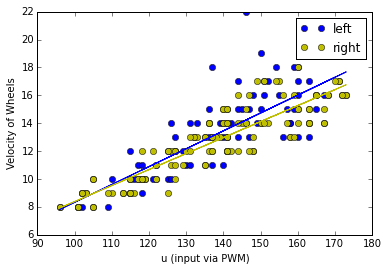

In [184]:
# plot results of least squares fit 
vleft_LS  = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"))

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

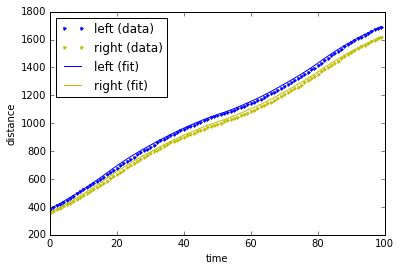

In [185]:
# model for simulation 
def sim(d0, u, b, c):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + b*u[t] - c
    return d
        
# plot simulated trajectories 
dleft_simulated  = sim(dleft[0], u, theta_left, beta_left)
dright_simulated = sim(dright[0], u, theta_right, beta_right)
plt.plot(range(DATA_LEN), dleft, 'b.', 
         range(DATA_LEN), dright, 'y.',
         range(DATA_LEN), dleft_simulated, 'b-', 
         range(DATA_LEN), dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 1</span>
 <span style="color:green">**Show your GSI your data collection and parameters.** Your GSI will double check your parameters.</span>

<a id='part4'></a>
## <span style="color:blue">Part 4: Open Loop Control</span>

###Materials
- Part 3 setup

Now design an open loop controller that takes desired wheel velocities v_star_left and v_star_right and sets the input u to an appropriate value for the pulse width modulation. To do this, use your model from the previous part to solve for the input $u[k]$that makes the model velocity $d[k+1] - d[k]$ equal to the desired velocity.

In [186]:
# DESIGN YOUR OPEN-LOOP CONTROL HERE
def driveStraight_left(v_star):
    # YOUR CODE HERE
    return (v_star + beta_left)/theta_left

def driveStraight_right(v_star):
    # YOUR CODE HERE
    return (v_star + beta_right)/theta_right


Now, lets do a quick simulation to check the behavior of the car based on our functions above:

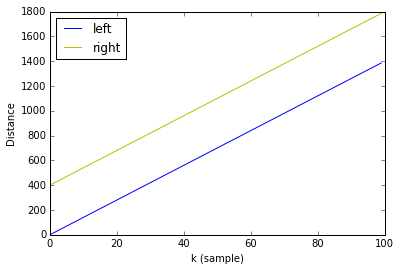

In [187]:
def sim_open_loop(d0_left, d0_right, theta_left, theta_right, beta_left, beta_right, v_star, N):
    d_L = np.zeros(N)
    d_R = np.zeros(N)
    d_L[0] = d0_left
    d_R[0] = d0_right
    for t in range(N-1):
        delta = d_L[t] - d_R[t]
        d_L[t+1] = d_L[t] + theta_left*driveStraight_left(v_star) - beta_left
        d_R[t+1] = d_R[t] + theta_right*driveStraight_right(v_star) - beta_right
    return d_L, d_R

LENGTH_SIMULATION = 100
d_sim_left, d_sim_right = sim_open_loop(0., 400., theta_left, theta_right, beta_left, beta_right, 14, LENGTH_SIMULATION)

plt.plot(range(LENGTH_SIMULATION), d_sim_left, 'b-', range(LENGTH_SIMULATION), d_sim_right, 'y-')
plt.xlabel("k (sample)")
plt.ylabel("Distance")
plt.legend(("left", "right"), loc="best")

Take a look at the plot above. If you have good values, the lines should have very similar slopes (velocities). 

<a id='part5'></a>
## <span style="color:blue">Part 5: Closed Loop Simulation and Modeling</span>

###Materials
- Part 4 setup

Now that we have an open loop model, we can build a closed loop controller that uses feedback to ensure that both wheels drive at the same velocity. The controller has 2 inputs, namely the desired velocity and the difference between the wheel distances $\delta[k] = d_L[k] - d_R[k]$.

<span style='color:red'>**Using the information above, draw a block diagram of both wheels' controllers.**</span> Show this diagram to your GSI before moving on. Keep this somewhere, as you will use it in your report.

<span style='color:red'>**Now derive the closed loop update equation for the differences $\delta[k]$ corresponding to your controller.**</span> Keep this somewhere, as you will use it in your report.

Next we need to choose values for the control gains so that the $\delta[k]$ update equation is stable. There should be a wide range of parameter values that make it stable, so we can tune the gains to get the desired performance. Try tuning your gains and simulating the model to observe its performance. Now try it with slightly wrong estimates for the parameters $\theta$ and $\beta$. Because of the feedback, your closed-loop controller should make both wheels drive at the same velocity even if the parameters are a bit off. Choose values $k_L$ and $k_R$, then fill in the two functions below. Run the similation in the second block to see how different parameters affect the system.

In [190]:
# DESIGN YOUR CLOSED-LOOP CONTROL HERE
def driveStraight_left(v_star, delta):
    # YOUR CODE HERE
    k_left = -0.2
    return (v_star + beta_left)/theta_left + k_left/theta_left*delta
    
def driveStraight_right(v_star, delta):
    # YOUR CODE HERE
    k_right = 0.2
    return (v_star + beta_right)/theta_right + k_right/theta_right*delta

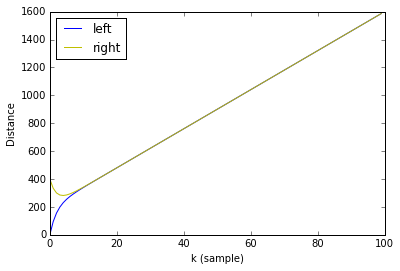

In [191]:
def sim_closed_loop(d0_left, d0_right, theta_left, theta_right, beta_left, beta_right, v_star, N):
    d_L = np.zeros(N)
    d_R = np.zeros(N)
    d_L[0] = d0_left
    d_R[0] = d0_right
    for t in range(N-1):
        delta = d_L[t] - d_R[t]
        d_L[t+1] = d_L[t] + theta_left*driveStraight_left(v_star, delta) - beta_left
        d_R[t+1] = d_R[t] + theta_right*driveStraight_right(v_star, delta) - beta_right
    return d_L, d_R

LENGTH_SIMULATION = 100
d_sim_left, d_sim_right = sim_closed_loop(0., 400., theta_left, theta_right, beta_left, beta_right, 14, LENGTH_SIMULATION)

plt.plot(range(LENGTH_SIMULATION), d_sim_left, 'b-', range(LENGTH_SIMULATION), d_sim_right, 'y-')
plt.xlabel("k (sample)")
plt.ylabel("Distance")
plt.legend(("left", "right"), loc="best")

The simulation above shows how the wheels will converge to the same distance traveled, even if one starts out a little bit ahead. Think about how the convergence time will affect the stability of the system.

Now implement the controller in the Launchpad. The sketch <b>`closed_loop.ino`</b> contains some code that implements the closed loop control. Fill in the parts labeled `YOUR CODE HERE`:
- desired velocity: v_star 
- estimated parameters: theta_left, theta_right, beta_left, beta_right
- control gains: k_left, k_right (these can be tuned to get the desired behavior
- functions driveStraight_left and driveStraight_right that take the desired velocity v_star and the wheel distance difference delta[k], and returns the PWM control input

Upload the sketch to your Launchpad. Your car wheels are going to move in this step, too. Make sure that the car is suspended above the desk.
 
Check that the wheels are moving as you expect them to. If you use your hand to put some friction on the wheels, does the feedback correct for it?

Once you are satisfied that your motors work and your closed loop is implemented, put the car on the ground. Click the reset button, the SIXT33N should go in a straight line. Does it behave how you expect? If it behaves erroneously (for example the controller oscillates), go back to the simulation and try different eigenvalues. This is an artifact of using a linear model as an approximation of the system and can be solved by picking a more suitable controller gain.

<span style='color:red'>**What are some reasons why the simulation might behave differently from the car? What about the differences between when the car is on the ground versus when it is on the desk?**</span>

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">**Show your GSI that your car moves in a straight line.** Your GSI will also check your block diagram and k values.</span>